# Data exploration

## Data exploration using Pandas

In [135]:
%matplotlib widget
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')
query = 'SELECT * FROM github_events'


df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
df.head()



,repo,type,actor,timestamp
0,yos124to2pholskia/repo12,PushEvent,ttgds3asu,2024-01-30 12:03:24.127240
1,amarinkovic/.dotfiles,PushEvent,amarinkovic,2024-01-30 12:03:24.127775
2,SP-Geno/2024_Geno,PushEvent,github-actions[bot],2024-01-30 12:03:24.127829
3,yos124to2pholskia/repo7,PushEvent,ttgds3asu,2024-01-30 12:03:24.127838
4,dbeaver/cloudbeaver,CreateEvent,devnaumov,2024-01-30 12:03:24.127846


In [136]:
# Check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730 entries, 0 to 11729
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   repo       11730 non-null  object        
 1   type       11730 non-null  object        
 2   actor      11730 non-null  object        
 3   timestamp  11730 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 366.7+ KB


In [137]:
# Summary statistics of numerical columns
df.describe()

,timestamp
count,11730
mean,2024-01-30 12:37:41.430206720
min,2024-01-30 12:03:24.127240
25%,2024-01-30 12:20:28.558031872
50%,2024-01-30 12:37:41.578468864
75%,2024-01-30 12:54:54.929385216
max,2024-01-30 13:11:56.653242


In [110]:
# Count unique values in categorical columns
df['type'].value_counts()

type
PushEvent                        6644
CreateEvent                       690
PullRequestEvent                  419
IssueCommentEvent                 265
WatchEvent                        232
PullRequestReviewEvent            205
DeleteEvent                       180
IssuesEvent                       113
PullRequestReviewCommentEvent      91
ForkEvent                          81
ReleaseEvent                       35
MemberEvent                        19
PublicEvent                        15
CommitCommentEvent                  6
GollumEvent                         5
Name: count, dtype: int64

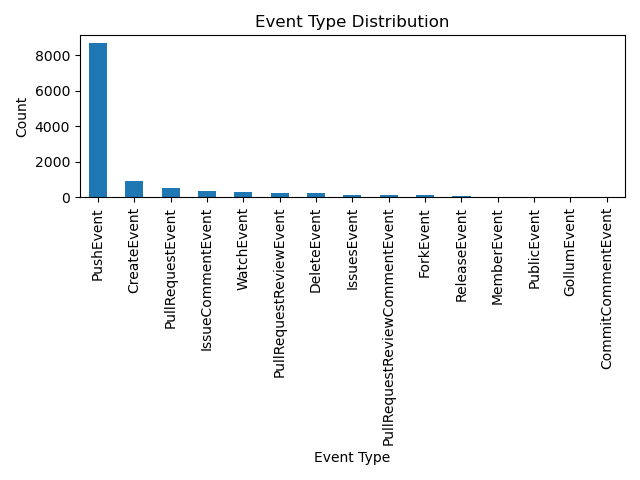

In [138]:
# Plot a bar chart for categorical columns
plt.figure()  # Create another new figure object
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Event Type Distribution')
plt.tight_layout()
plt.show()  # Display the plot


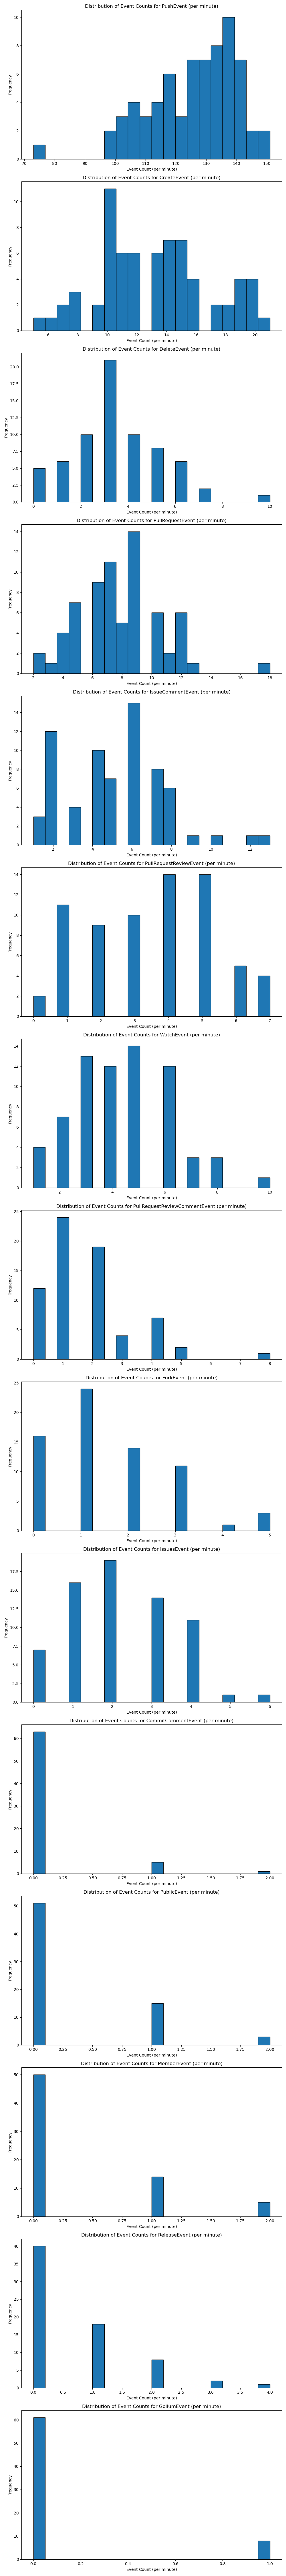

In [139]:
# Group the DataFrame by minute intervals and event types
grouped = df.groupby([pd.Grouper(key='timestamp', freq='1Min'), 'type']).size().unstack(fill_value=0)

# Get unique event types
unique_event_types = df['type'].unique()

# Create subplots for each event type
fig, axes = plt.subplots(nrows=len(unique_event_types), figsize=(10, 6 * len(unique_event_types)))

for i, event_type in enumerate(unique_event_types):
    ax = axes[i]
    
    # Create a histogram for the event count of the current type
    ax.hist(grouped[event_type], bins=20, edgecolor='k')
    ax.set_xlabel('Event Count (per minute)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Event Counts for {event_type} (per minute)')

plt.tight_layout()
plt.show()


## Exploration using specialized libraries, like Facets


In [12]:
!pip install facets-overview

In [16]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from sqlalchemy import create_engine
import pandas as pd
from IPython.core.display import display, HTML
import base64

# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')
query = 'SELECT * FROM github_events '

# Execute the query and fetch data into a DataFrame
df = pd.read_sql(query, engine)
proto = GenericFeatureStatisticsGenerator().ProtoFromDataFrames([{'name': 'test', 'table': df}])

In [11]:

protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))